In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics

file_name = "spotify_utf.csv"
df_data = pd.read_csv(file_name)
df_data.head()

df_data_clear = df_data.drop(columns=['id','release_date','mode'])
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['year']<1950].index)
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['popularity']<=2].index)
df_data_clear

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,name,popularity,speechiness,tempo,valence,year
1151,0.9850,"['Franz Schubert', 'Isaac Stern']",0.364,248627,0.0552,0,0.537000,2,0.0946,-23.253,"Sonata for Violin and Piano No. 1 in D Major, ...",4,0.0438,123.672,0.3180,1950
1198,0.0550,"['Marika Rossa', 'Alberto Ruiz']",0.754,330000,0.7390,0,0.871000,7,0.1090,-6.333,Back To The Old School ( V2 ) - Original Stick,13,0.0636,128.005,0.2120,1951
1289,0.9900,['Sonny Terry'],0.616,152693,0.1210,0,0.771000,4,0.3160,-17.309,Alcoholic Blues,3,0.0641,83.076,0.8480,1952
1299,0.8660,['Wallace House'],0.663,195413,0.1500,0,0.000000,7,0.0758,-14.195,On Ilkley Moor Bar t'At,11,0.3220,69.256,0.6430,1952
1399,0.9790,"['Ludwig van Beethoven', 'Daniel Barenboim', '...",0.184,568880,0.0233,0,0.947000,11,0.0940,-30.240,Concerto for Piano and Orchestra No. 5 in E-Fl...,6,0.0368,67.309,0.0822,1953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,I Found You,70,0.0385,129.916,0.4720,2020


In [29]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [30]:
df_data_clear.duplicated().sum()
df_data_clear = df_data_clear[~df_data_clear.duplicated()==1]
df_data_clear.shape

(134183, 16)

In [31]:
df_data_clear["popularity"][df_data_clear.popularity<=50]=0
df_data_clear["popularity"][df_data_clear.popularity>50]=1

df_data_clear["popularity"].value_counts()

<ipython-input-31-f2f9a1a4a32a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clear["popularity"][df_data_clear.popularity<=50]=0
D:\Anaconda\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-31-f2f9a1a4a32a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clear["popularity"][df_data_clear.popularity>50]=1


0    98359
1    35824
Name: popularity, dtype: int64

In [32]:
X_col = ['acousticness', 'danceability', 'duration_ms', 'energy', 
          'instrumentalness', 'key', 'liveness', 'loudness', 
          'speechiness', 'tempo', 'valence','year','explicit']

In [33]:
X = df_data_clear[X_col]
y = df_data_clear['popularity']

In [34]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=123)

In [36]:
train_scores = []
test_scores = []

rf = RandomForestClassifier(random_state=0)
estimator_range = range(1, 100, 5)

for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

In [37]:
list(estimator_range)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]

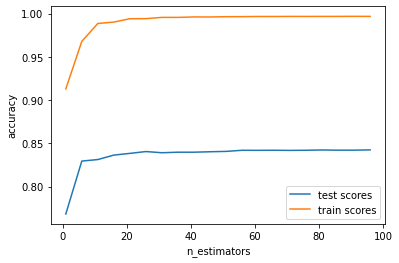

In [38]:
import matplotlib.pyplot as plt
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [39]:
clf2 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
%time clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print('RF accuracy: ',accuracy_score(y_test, y_pred))

Wall time: 24.4 s
RF accuracy:  0.8418291301496452


In [40]:
clf3 = AdaBoostClassifier(n_estimators=100)
%time clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print('AdaBoost accuracy: ',accuracy_score(y_test, y_pred))


Wall time: 12.7 s
AdaBoost accuracy:  0.8434090502593454
